In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
%matplotlib inline 
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [14]:
df = pd.read_excel("Book6.xlsx")  

In [15]:
df

,Date,U_R,I_P_I,Real_GDP,C_P_I,T_E,T_I,O_P,M_P,F_P,TAX,GOV_S,N_S,F_R,T_P,NASDAQ
0,2002-01-01,5.1,88.5452,13430.537337,177.700,5.266700e+10,8.511100e+10,19.72,137.560525,172.928865,184.245205,152.855754,194.750250,54.306179,91.463392,1934.030029
1,2002-02-01,5.1,88.5362,13344.510769,178.000,5.306100e+10,8.347300e+10,20.72,60.004622,86.598189,91.662904,85.340417,108.222265,154.578413,33.810857,1731.489990
2,2002-03-01,5.1,89.2097,13410.249594,178.500,6.072800e+10,9.141500e+10,24.53,103.145397,82.610243,86.268422,66.005617,74.768846,94.582865,86.889859,1845.349976
3,2002-04-01,5.3,89.6389,13462.221796,179.300,5.814600e+10,9.689100e+10,26.18,57.964063,72.455588,81.041873,53.723817,77.544877,58.823704,22.862743,1688.229980
4,2002-05-01,5.2,90.0271,13459.171753,179.500,5.988400e+10,9.764900e+10,27.04,103.296837,76.245491,82.879080,65.225204,64.827448,78.566108,66.161190,1615.729980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2022-07-01,3.2,104.4852,19897.741856,295.271,1.757840e+11,2.712420e+11,101.62,161.917595,117.834775,124.455184,55.073651,121.032182,89.679415,71.545074,12390.690430
247,2022-08-01,3.4,104.4135,20200.378354,295.620,1.816310e+11,2.836250e+11,93.67,120.393477,102.997344,114.025911,35.415193,92.352643,141.953181,150.492302,11816.200195
248,2022-09-01,3.2,104.8129,20069.546694,296.761,1.753850e+11,2.754750e+11,84.26,149.003732,66.999427,70.534230,27.760461,75.120021,57.532192,50.425833,10575.620117
249,2022-10-01,3.4,104.7474,20163.143266,298.062,1.804110e+11,2.827090e+11,87.55,205.143734,112.092491,118.724337,64.755707,124.168889,112.382418,93.135999,10988.150391


In [16]:
df.describe().T.to_clipboard()

In [17]:
df.isnull().sum()

Date        0
U_R         0
I_P_I       0
Real_GDP    0
C_P_I       0
T_E         0
T_I         0
O_P         0
M_P         0
F_P         0
TAX         0
GOV_S       0
N_S         0
F_R         0
T_P         0
NASDAQ      0
dtype: int64

In [18]:
df.shape

(251, 16)

<AxesSubplot:xlabel='U_R'>

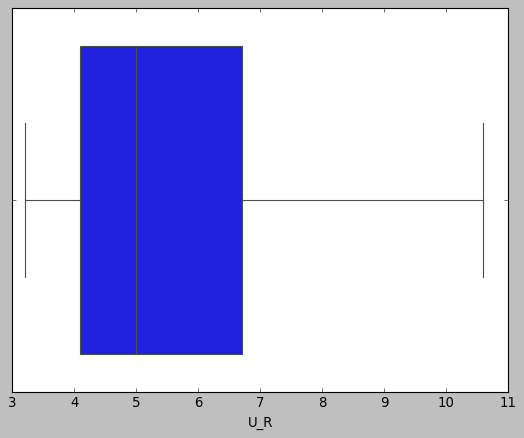

In [155]:
sns.boxplot(x=df.U_R)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      251 non-null    datetime64[ns]
 1   U_R       251 non-null    float64       
 2   I_P_I     251 non-null    float64       
 3   Real_GDP  251 non-null    float64       
 4   C_P_I     251 non-null    float64       
 5   T_E       251 non-null    float64       
 6   T_I       251 non-null    float64       
 7   O_P       251 non-null    float64       
 8   M_P       251 non-null    float64       
 9   F_P       251 non-null    float64       
 10  TAX       251 non-null    float64       
 11  GOV_S     251 non-null    float64       
 12  N_S       251 non-null    float64       
 13  F_R       251 non-null    float64       
 14  T_P       251 non-null    float64       
 15  NASDAQ    251 non-null    float64       
dtypes: datetime64[ns](1), float64(15)
memory usage: 31.5 KB


In [21]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.U_R),stats.skew(df.I_P_I),stats.skew(df.Real_GDP)]},
                        index=['U_R','I_P_I','Real_GDP'])  # Measure the skeweness of the required columns
Skewness

NameError: name 'stats' is not defined

In [153]:
df.describe().T.to_clipboard()

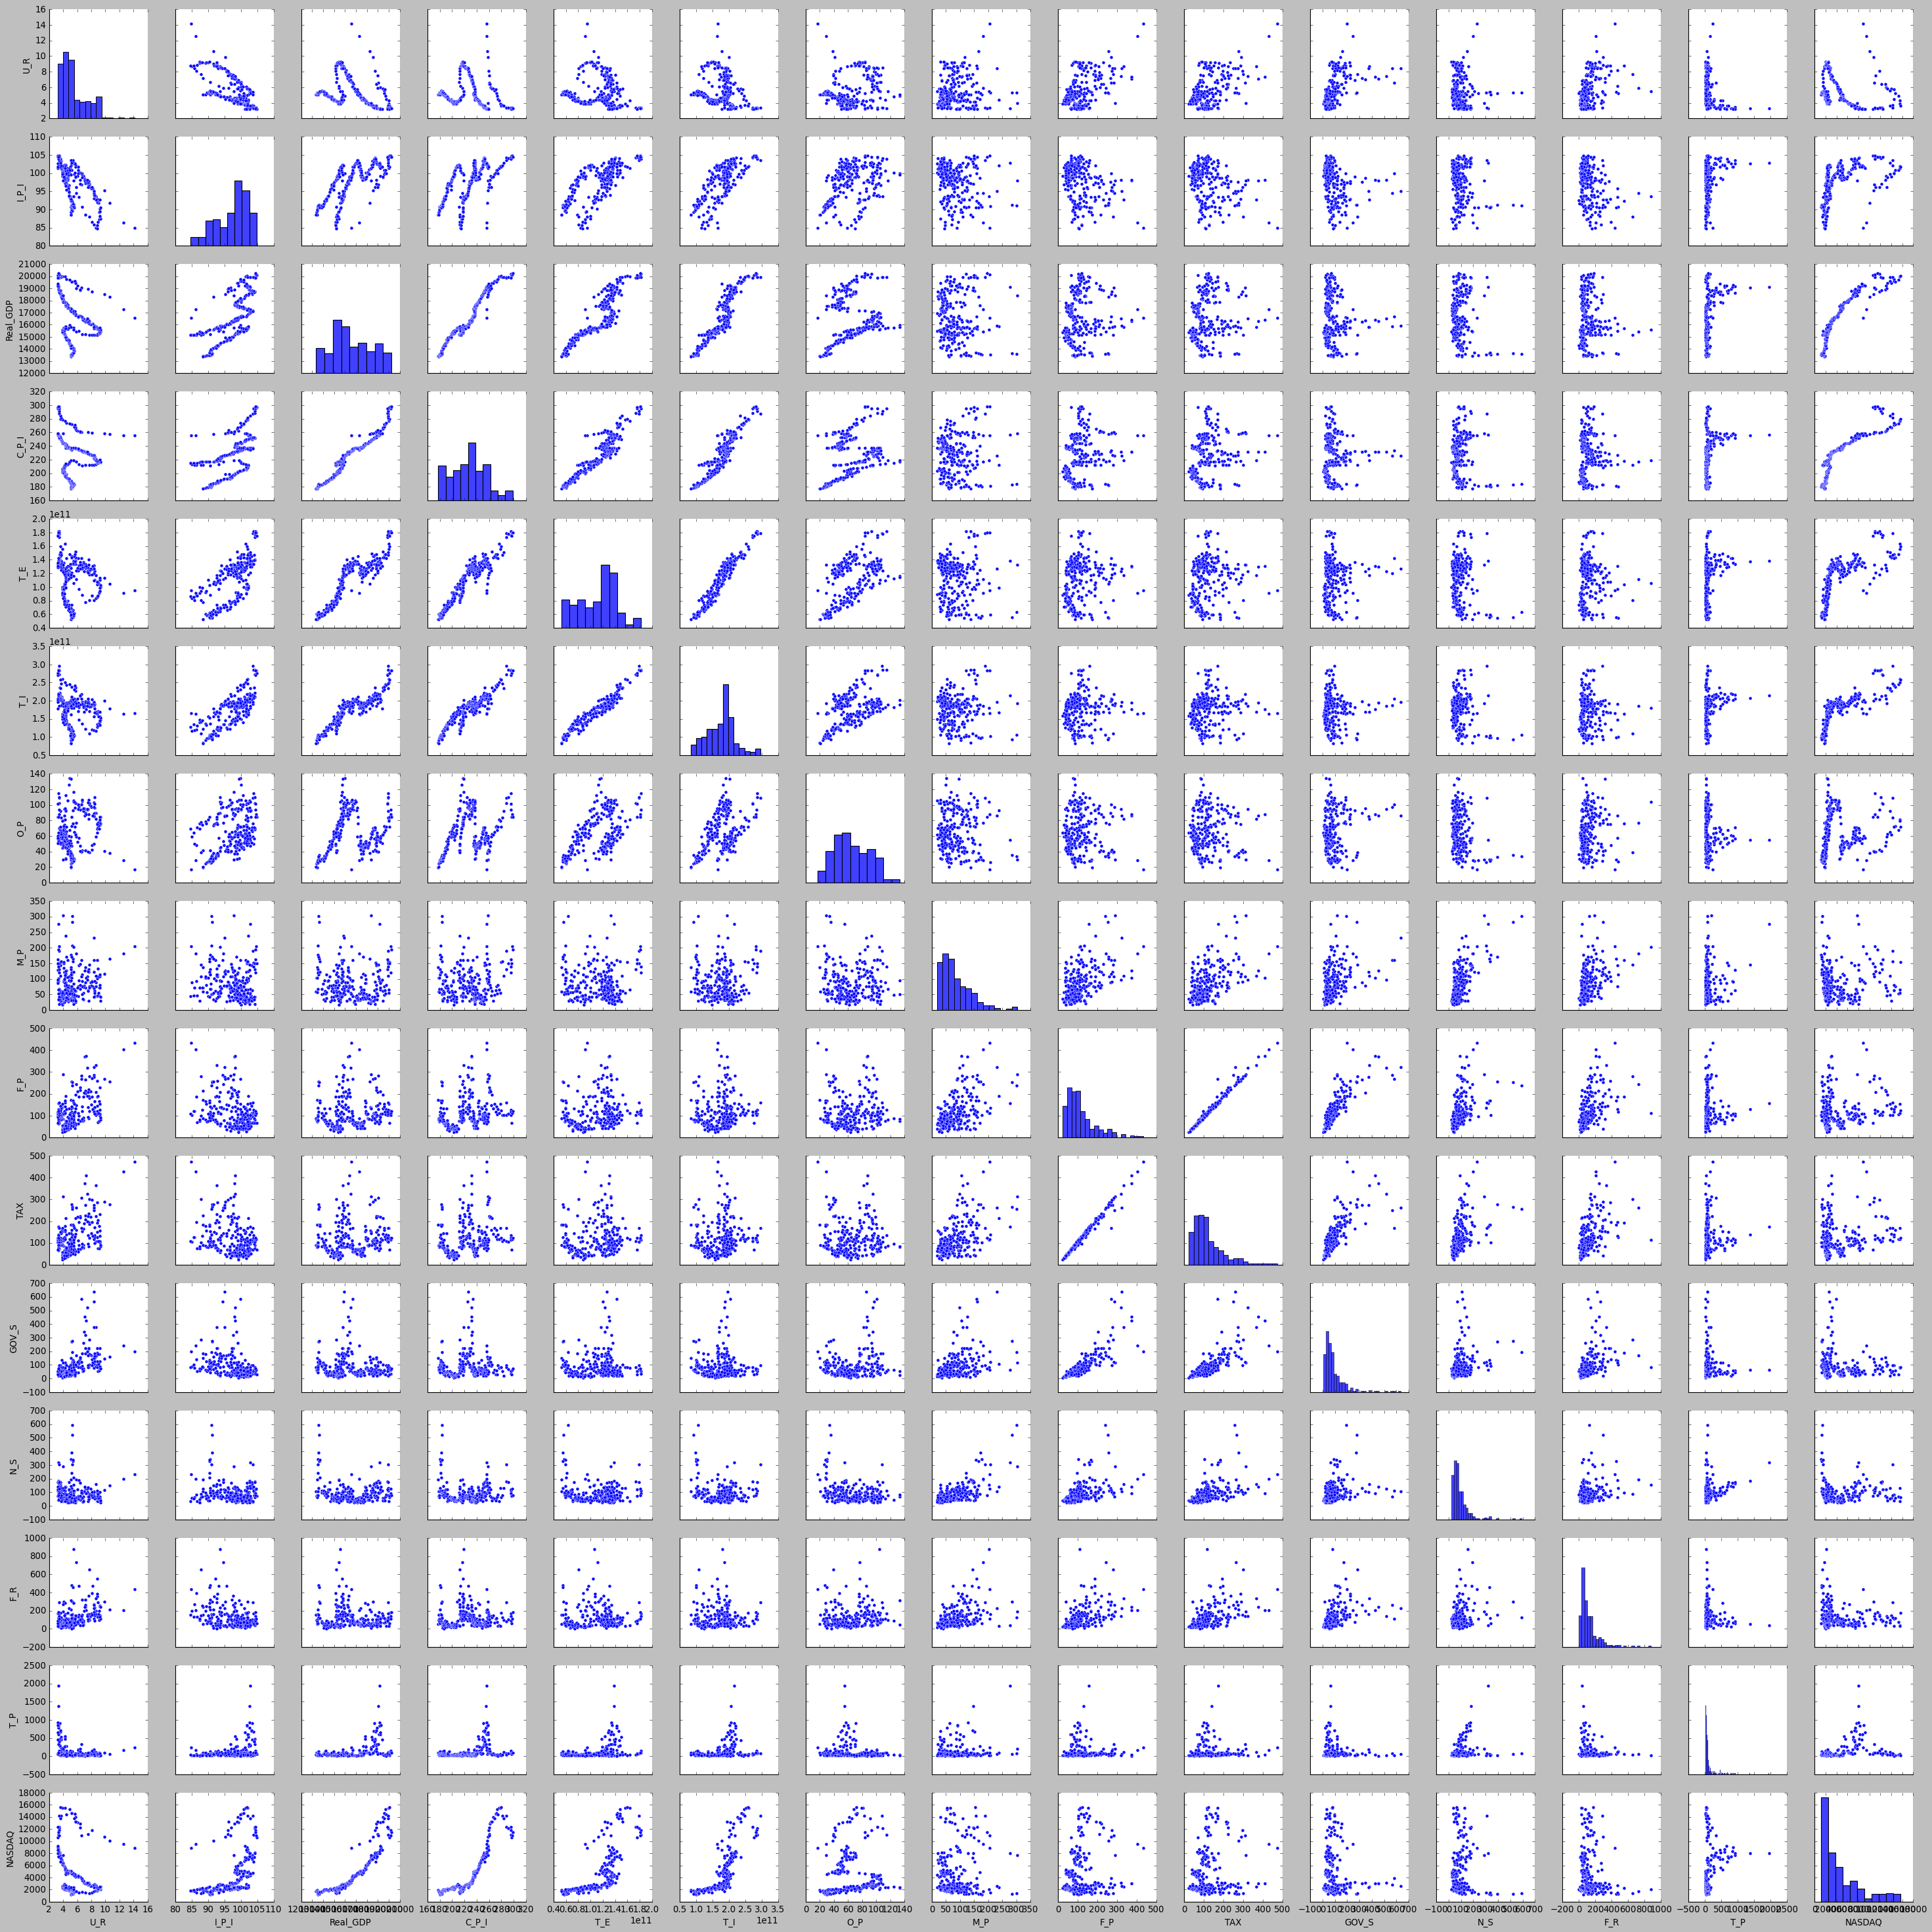

In [23]:
sns.pairplot(df)

In [24]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [25]:
df.columns

Index(['Date', 'U_R', 'I_P_I', 'Real_GDP', 'C_P_I', 'T_E', 'T_I', 'O_P', 'M_P',
       'F_P', 'TAX', 'GOV_S', 'N_S', 'F_R', 'T_P', 'NASDAQ'],
      dtype='object')

Description of U_R
----------------------------------------------------------------------------
count    251.000000
mean       5.510359
std        1.910008
min        3.200000
25%        4.100000
50%        5.000000
75%        6.700000
max       14.200000
Name: U_R, dtype: float64 Distribution of U_R
----------------------------------------------------------------------------


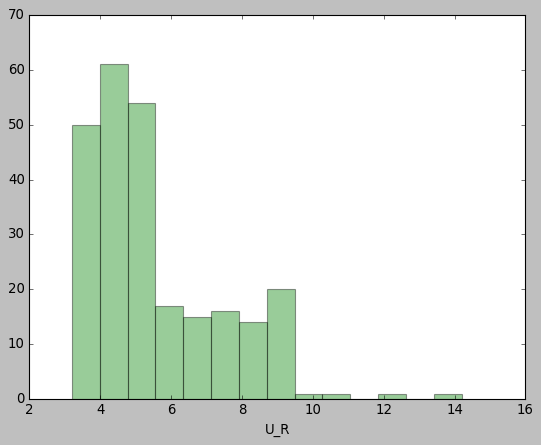

BoxPlot of U_R
----------------------------------------------------------------------------


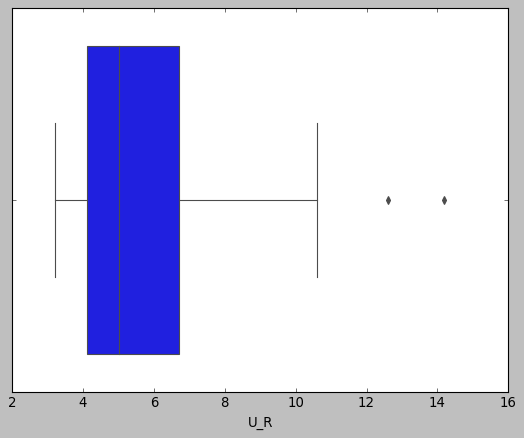

In [26]:
univariateAnalysis_numeric('U_R',20)

Description of I_P_I
----------------------------------------------------------------------------
count    251.000000
mean      97.432534
std        4.859115
min       84.727700
25%       93.655500
50%       98.730200
75%      101.374000
max      104.812900
Name: I_P_I, dtype: float64 Distribution of I_P_I
----------------------------------------------------------------------------


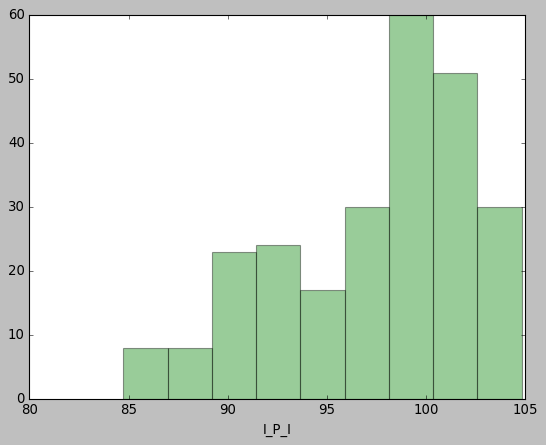

BoxPlot of I_P_I
----------------------------------------------------------------------------


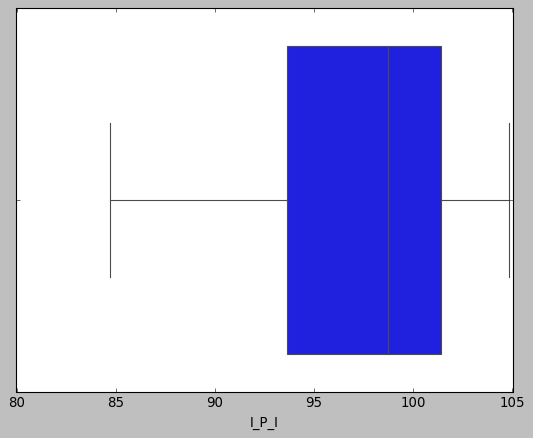

In [27]:
univariateAnalysis_numeric('I_P_I',20)

Description of Real_GDP
----------------------------------------------------------------------------
count      251.000000
mean     16590.022955
std       1836.154271
min      13344.510769
25%      15295.496710
50%      16254.985180
75%      18070.118215
max      20248.062508
Name: Real_GDP, dtype: float64 Distribution of Real_GDP
----------------------------------------------------------------------------


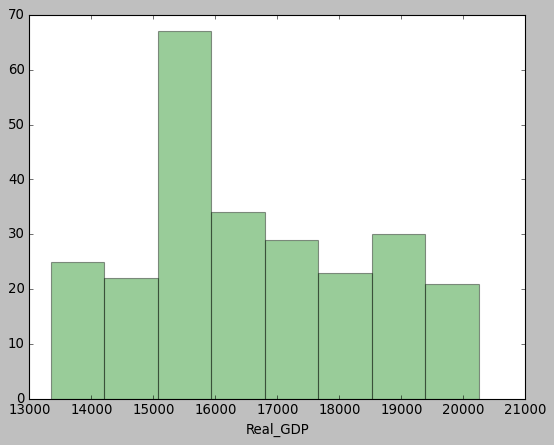

BoxPlot of Real_GDP
----------------------------------------------------------------------------


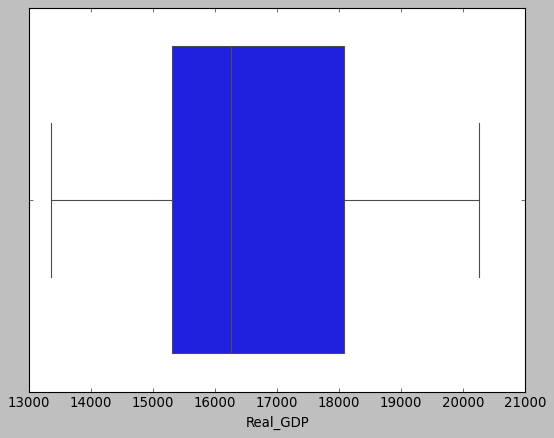

In [28]:
univariateAnalysis_numeric('Real_GDP',20)

Description of C_P_I
----------------------------------------------------------------------------
count    251.000000
mean     227.353223
std       28.579860
min      177.700000
25%      205.596000
50%      228.807000
75%      245.809000
max      298.349000
Name: C_P_I, dtype: float64 Distribution of C_P_I
----------------------------------------------------------------------------


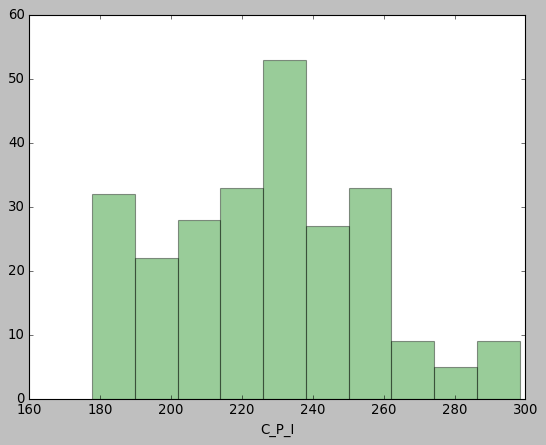

BoxPlot of C_P_I
----------------------------------------------------------------------------


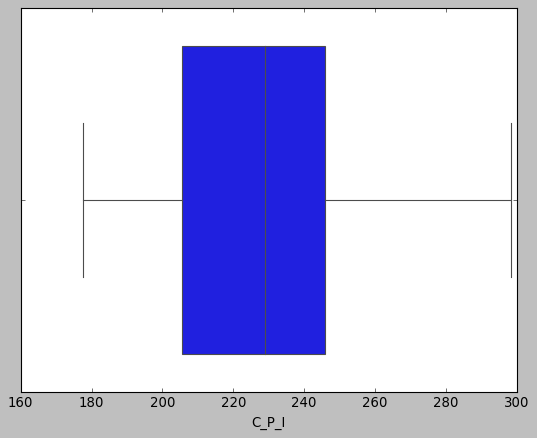

In [29]:
univariateAnalysis_numeric('C_P_I',20)

Description of T_E
----------------------------------------------------------------------------
count    2.510000e+02
mean     1.118386e+11
std      3.046117e+10
min      5.266700e+10
25%      8.812800e+10
50%      1.202450e+11
75%      1.330695e+11
max      1.820970e+11
Name: T_E, dtype: float64 Distribution of T_E
----------------------------------------------------------------------------


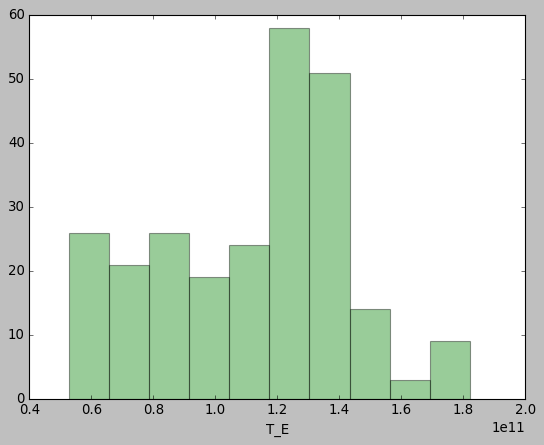

BoxPlot of T_E
----------------------------------------------------------------------------


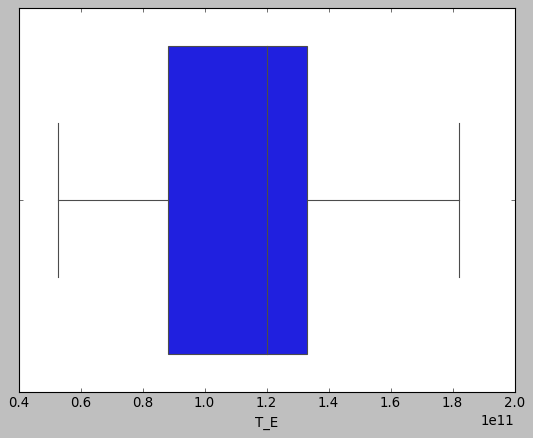

In [30]:
univariateAnalysis_numeric('T_E',20)

Description of T_I
----------------------------------------------------------------------------
count    2.510000e+02
mean     1.754855e+11
std      4.265089e+10
min      8.347300e+10
25%      1.466580e+11
50%      1.825750e+11
75%      1.985895e+11
max      2.965180e+11
Name: T_I, dtype: float64 Distribution of T_I
----------------------------------------------------------------------------


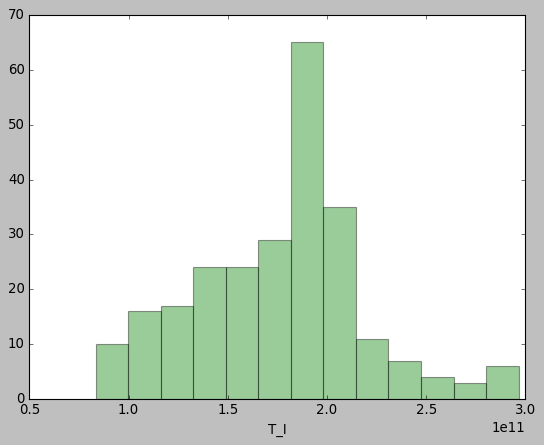

BoxPlot of T_I
----------------------------------------------------------------------------


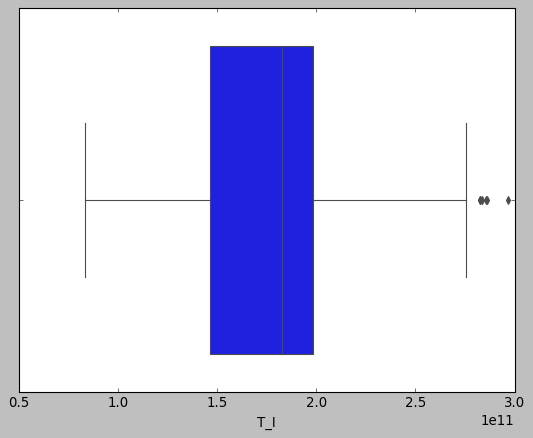

In [31]:
univariateAnalysis_numeric('T_I',20)

Description of O_P
----------------------------------------------------------------------------
count    251.000000
mean      65.715498
std       24.905541
min       16.550000
25%       46.930000
50%       62.260000
75%       86.060000
max      133.880000
Name: O_P, dtype: float64 Distribution of O_P
----------------------------------------------------------------------------


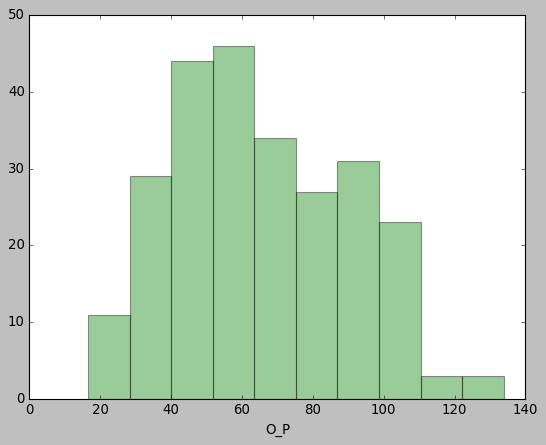

BoxPlot of O_P
----------------------------------------------------------------------------


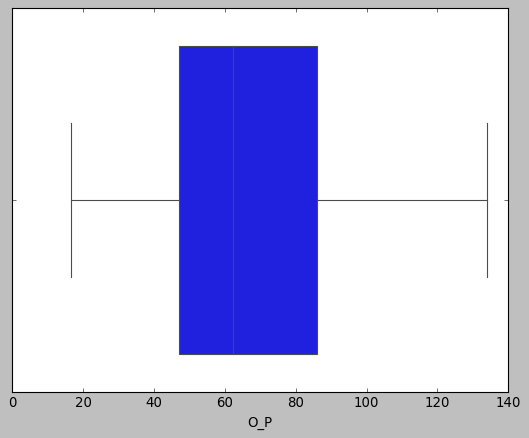

In [32]:
univariateAnalysis_numeric('O_P',20)

Description of M_P
----------------------------------------------------------------------------
count    251.000000
mean      85.558483
std       52.952825
min       17.616229
25%       44.941855
50%       71.181067
75%      112.355779
max      304.069276
Name: M_P, dtype: float64 Distribution of M_P
----------------------------------------------------------------------------


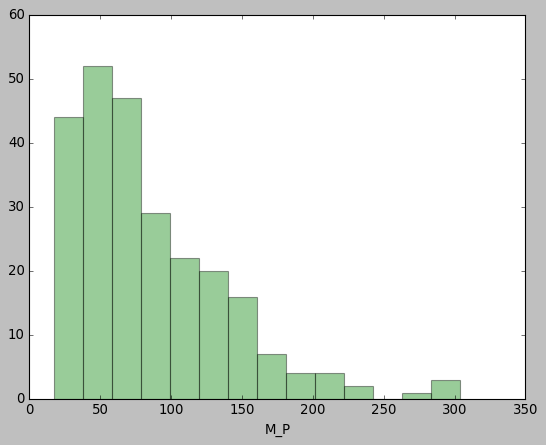

BoxPlot of M_P
----------------------------------------------------------------------------


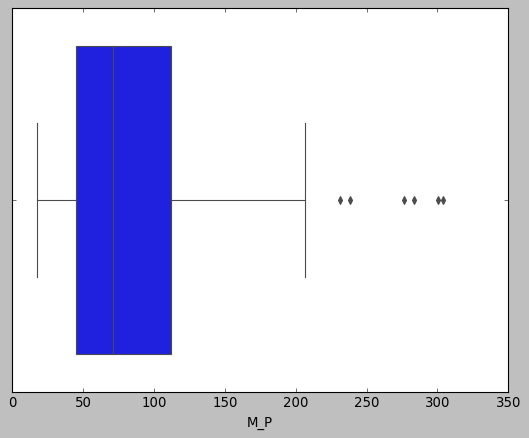

In [33]:
univariateAnalysis_numeric('M_P',20)

Description of F_P
----------------------------------------------------------------------------
count    251.000000
mean     116.649852
std       73.907420
min       23.052065
25%       66.588951
50%       99.116237
75%      140.396320
max      433.293459
Name: F_P, dtype: float64 Distribution of F_P
----------------------------------------------------------------------------


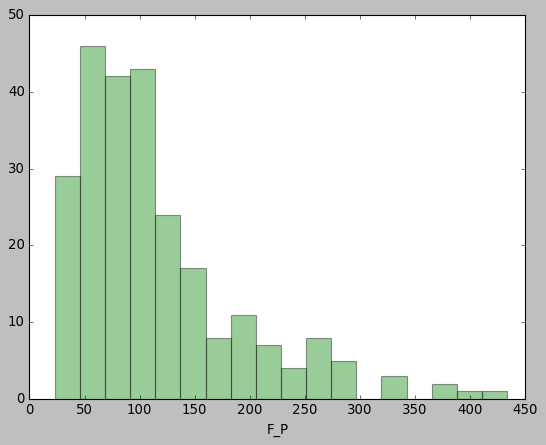

BoxPlot of F_P
----------------------------------------------------------------------------


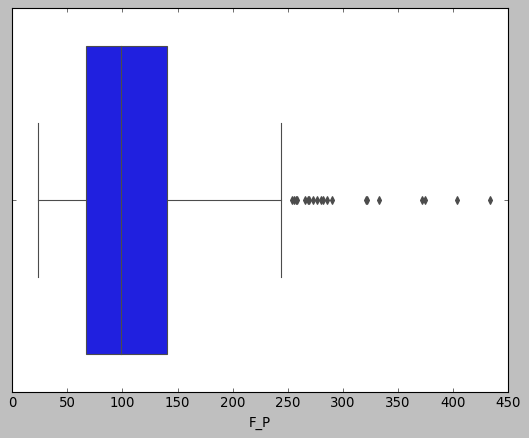

In [34]:
univariateAnalysis_numeric('F_P',20)

Description of TAX
----------------------------------------------------------------------------
count    251.000000
mean     121.718761
std       76.751687
min       24.441217
25%       70.531865
50%      102.478109
75%      150.425074
max      471.899606
Name: TAX, dtype: float64 Distribution of TAX
----------------------------------------------------------------------------


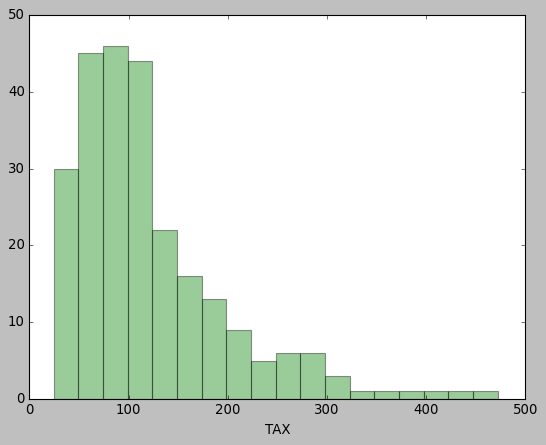

BoxPlot of TAX
----------------------------------------------------------------------------


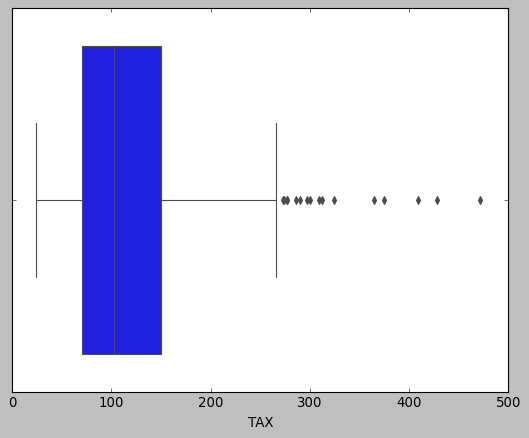

In [35]:
univariateAnalysis_numeric('TAX',20)

Description of GOV_S
----------------------------------------------------------------------------
count    251.000000
mean      93.511942
std       95.518328
min        5.777243
25%       37.214901
50%       64.755707
75%      108.062741
max      635.271777
Name: GOV_S, dtype: float64 Distribution of GOV_S
----------------------------------------------------------------------------


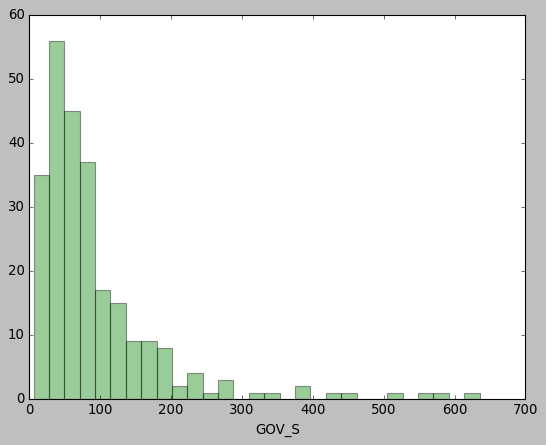

BoxPlot of GOV_S
----------------------------------------------------------------------------


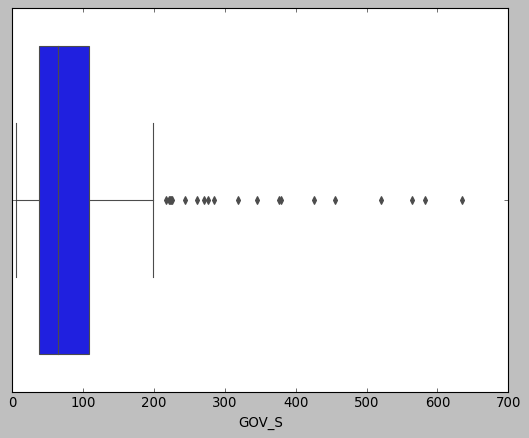

In [36]:
univariateAnalysis_numeric('GOV_S',20)

Description of N_S
----------------------------------------------------------------------------
count    251.000000
mean      93.118227
std       73.618623
min       23.737117
25%       49.239384
50%       71.131372
75%      110.379411
max      593.459985
Name: N_S, dtype: float64 Distribution of N_S
----------------------------------------------------------------------------


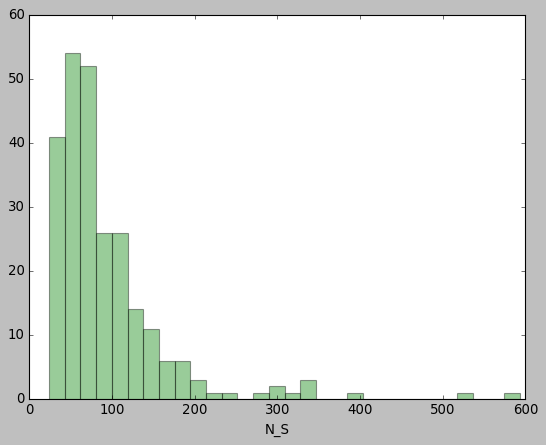

BoxPlot of N_S
----------------------------------------------------------------------------


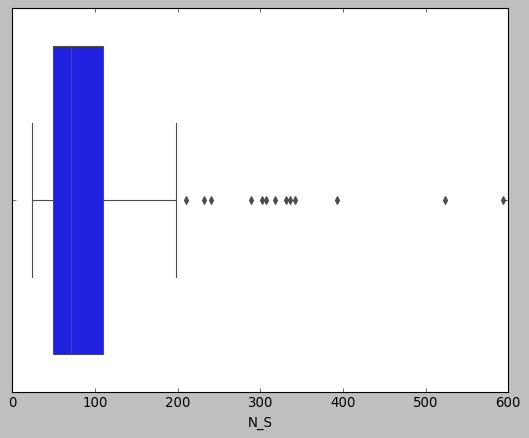

In [37]:
univariateAnalysis_numeric('N_S',20)

Description of F_R
----------------------------------------------------------------------------
count    251.000000
mean     123.273166
std      120.750902
min        0.000000
25%       47.010132
50%       84.247051
75%      153.969180
max      877.545946
Name: F_R, dtype: float64 Distribution of F_R
----------------------------------------------------------------------------


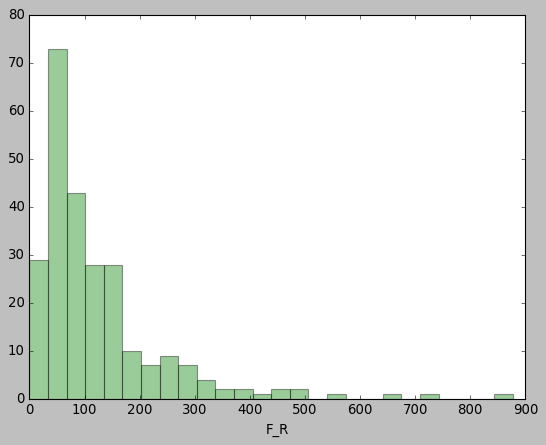

BoxPlot of F_R
----------------------------------------------------------------------------


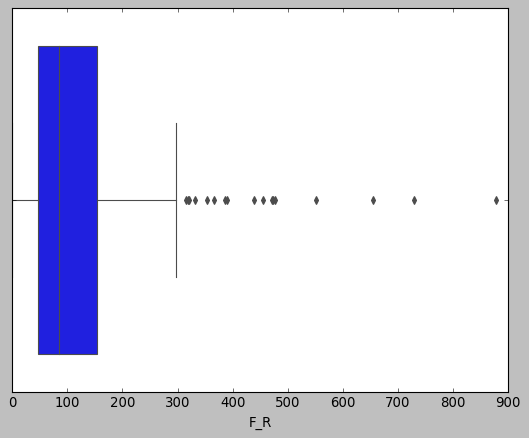

In [38]:
univariateAnalysis_numeric('F_R',20)

Description of T_P
----------------------------------------------------------------------------
count     251.000000
mean      122.846569
std       218.653650
min         7.672618
25%        28.210342
50%        50.425833
75%        92.611450
max      1946.683000
Name: T_P, dtype: float64 Distribution of T_P
----------------------------------------------------------------------------


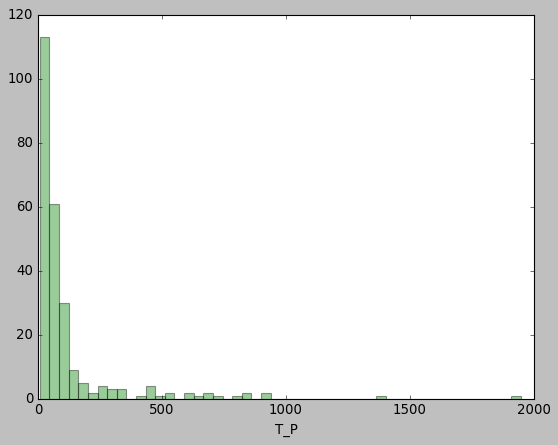

BoxPlot of T_P
----------------------------------------------------------------------------


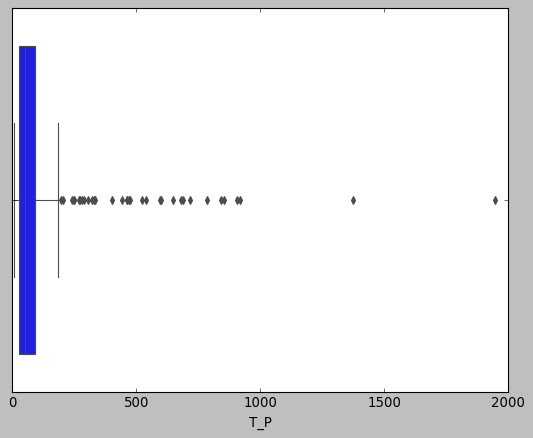

In [39]:
univariateAnalysis_numeric('T_P',20)

Description of NASDAQ
----------------------------------------------------------------------------
count      251.000000
mean      4768.912832
std       3644.189423
min       1172.060059
25%       2162.090088
50%       2977.229980
75%       6462.310058
max      15644.969727
Name: NASDAQ, dtype: float64 Distribution of NASDAQ
----------------------------------------------------------------------------


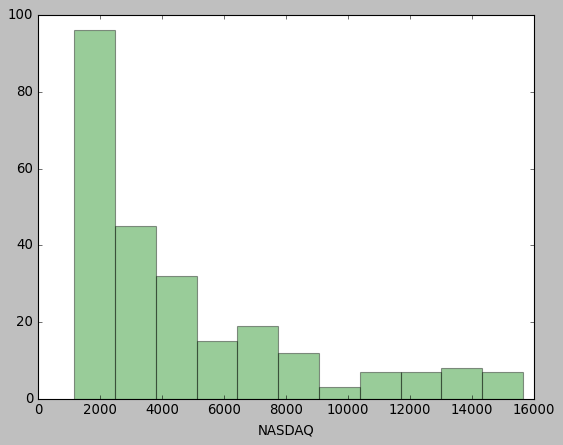

BoxPlot of NASDAQ
----------------------------------------------------------------------------


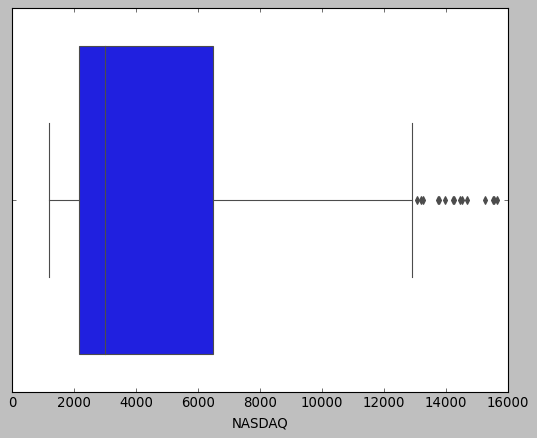

In [40]:
univariateAnalysis_numeric('NASDAQ',20)

In [41]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [42]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df['M_P'])
print("lower range",lr, "and upper range", ur)

lower range -56.179031517969946 and upper range 213.47666527672322


In [44]:
corr = df.corr(method='pearson')
corr

,U_R,I_P_I,Real_GDP,C_P_I,T_E,T_I,O_P,M_P,F_P,TAX,GOV_S,N_S,F_R,T_P,NASDAQ
U_R,1.000000,-0.671262,-0.299538,-0.139967,-0.146748,-0.230652,0.163851,0.097952,0.568765,0.545316,0.526443,-0.019337,0.458481,-0.297587,-0.253812
I_P_I,-0.671262,1.000000,0.689644,0.603580,0.701759,0.742695,0.369646,-0.156829,-0.316982,-0.318726,-0.289342,-0.213390,-0.387011,0.294838,0.503754
Real_GDP,-0.299538,0.689644,1.000000,0.972642,0.892271,0.908270,0.213125,-0.023089,0.076901,0.088409,-0.119648,-0.099999,-0.130744,0.404971,0.897558
C_P_I,-0.139967,0.603580,0.972642,1.000000,0.928715,0.929636,0.317877,0.050378,0.185965,0.190033,-0.010920,-0.076524,-0.021497,0.317599,0.876357
T_E,-0.146748,0.701759,0.892271,0.928715,1.000000,0.960979,0.538360,-0.035367,0.108694,0.093524,0.043688,-0.174290,-0.039984,0.263310,0.712640
T_I,-0.230652,0.742695,0.908270,0.929636,0.960979,1.000000,0.514449,0.016315,0.075835,0.068454,-0.027604,-0.148808,-0.073061,0.252139,0.785500
O_P,0.163851,0.369646,0.213125,0.317877,0.538360,0.514449,1.000000,-0.042689,0.014096,-0.028537,0.170258,-0.269902,0.096524,-0.121456,0.050956
M_P,0.097952,-0.156829,-0.023089,0.050378,-0.035367,0.016315,-0.042689,1.000000,0.524524,0.516706,0.395015,0.693015,0.437557,0.165590,0.061704
F_P,0.568765,-0.316982,0.076901,0.185965,0.108694,0.075835,0.014096,0.524524,1.000000,0.989445,0.820337,0.474250,0.509677,0.052125,0.151618
TAX,0.545316,-0.318726,0.088409,0.190033,0.093524,0.068454,-0.028537,0.516706,0.989445,1.000000,0.747804,0.492268,0.514408,0.071724,0.173836


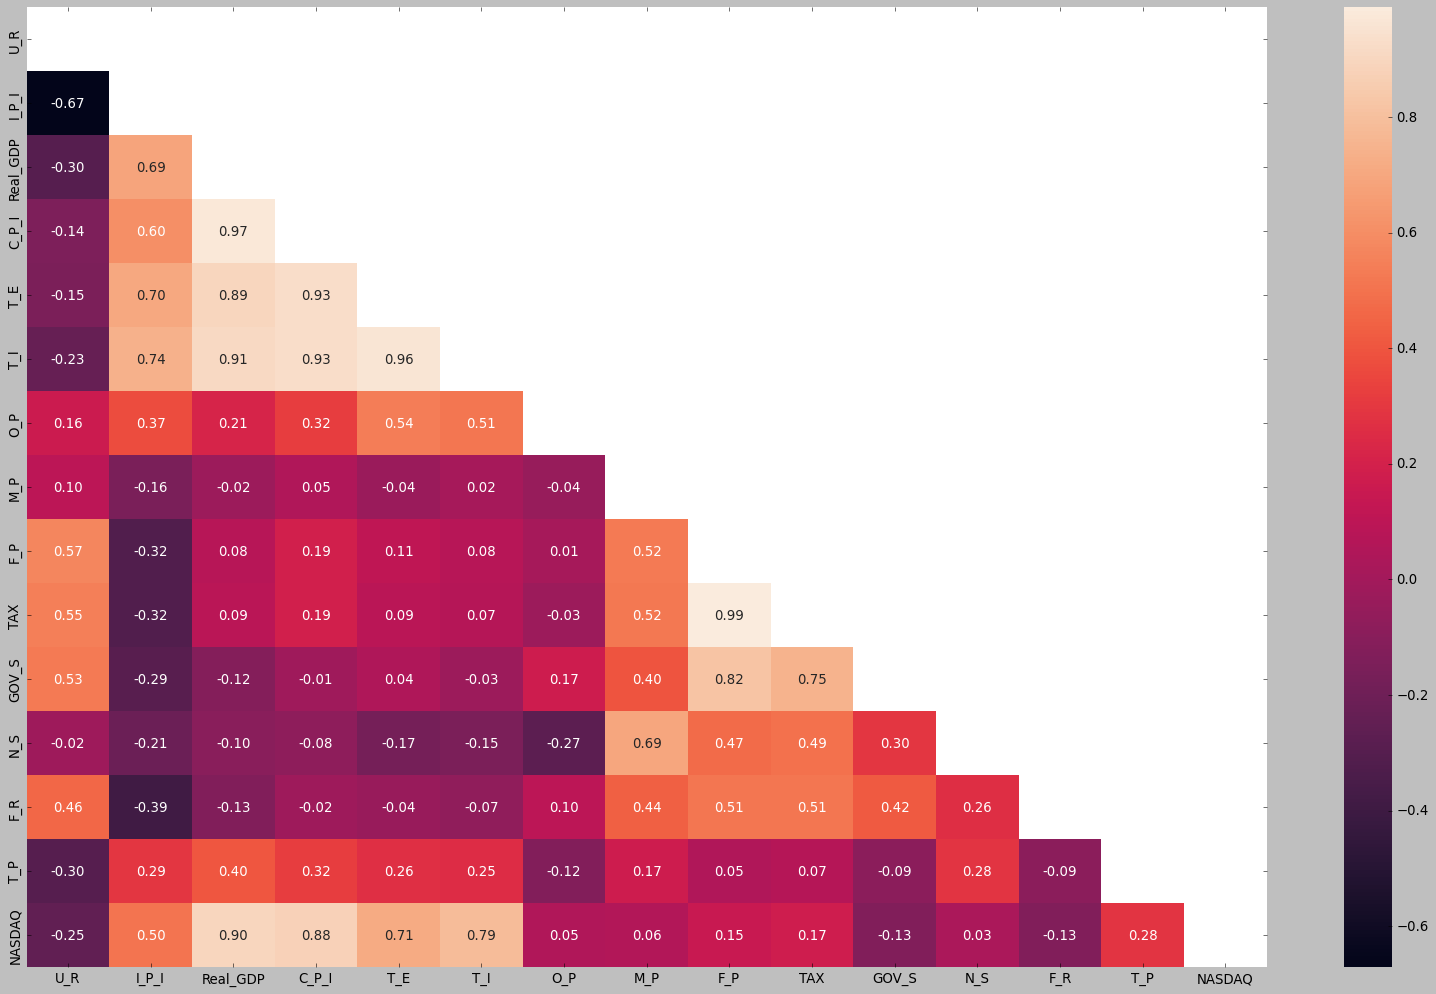

In [45]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [46]:
df['M_P']=np.where(df['M_P']>ur,ur,df['M_P'])
df['M_P']=np.where(df['M_P']<lr,lr,df['M_P'])

<AxesSubplot:xlabel='M_P'>

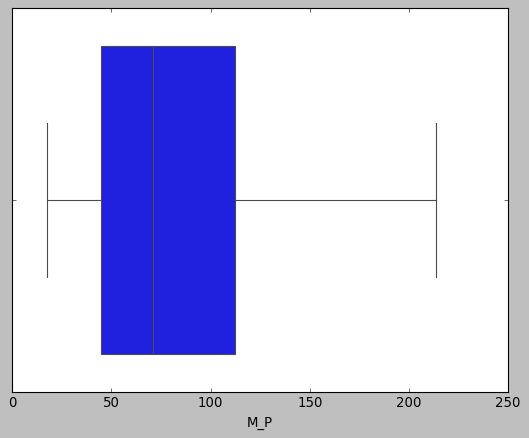

In [47]:
sns.boxplot(x=df.M_P)

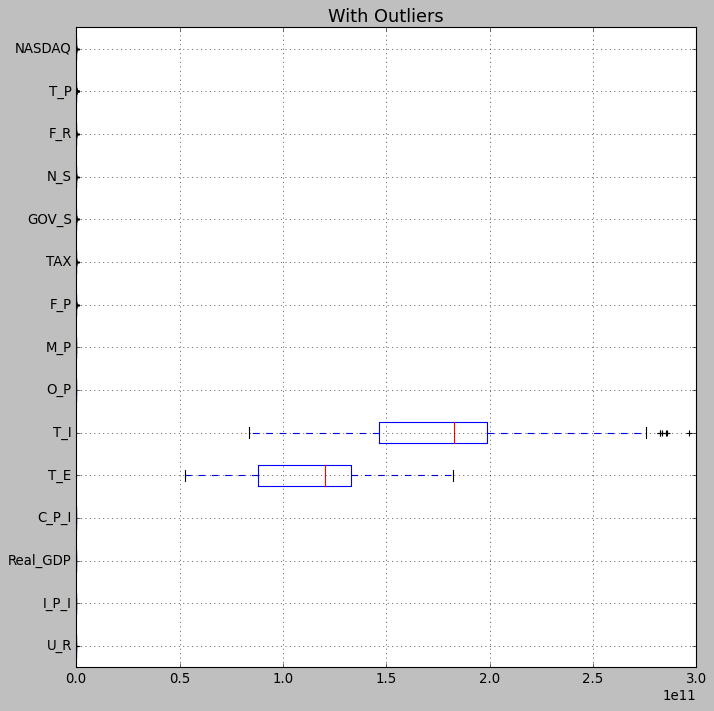

In [49]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='object') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [50]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [51]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

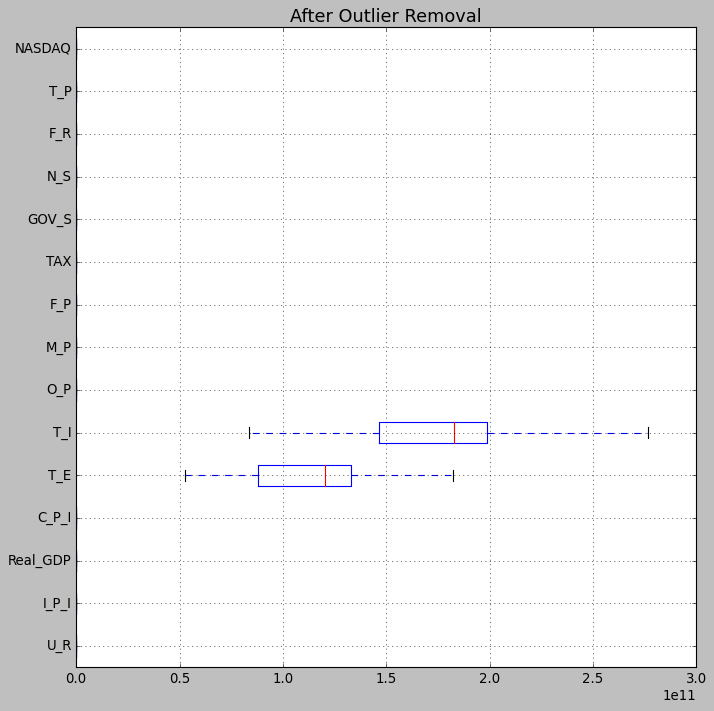

In [52]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [53]:
df=df.drop('Date',axis=1)

In [137]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = df.drop(['NASDAQ','Real_GDP','O_P','TAX','N_S','T_P'], axis=1)


# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df[['NASDAQ']]

In [138]:
from sklearn.model_selection import train_test_split

In [139]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [140]:

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [141]:

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for U_R is -376.6749899794665
The coefficient for I_P_I is -106.08130013794002
The coefficient for C_P_I is 150.53584611559728
The coefficient for T_E is -8.729215750236108e-08
The coefficient for T_I is 3.209451904240268e-08
The coefficient for M_P is -6.388309088686809
The coefficient for F_P is 13.259960149012942
The coefficient for GOV_S is -7.444349655802593
The coefficient for F_R is -3.1100697634228323


In [142]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -12999.71857178411


In [143]:
regression_model.score(X_train, y_train)

0.9201053847310052

In [144]:
regression_model.score(X_test, y_test)

0.9148488745761355

In [145]:
from sklearn import metrics

In [146]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

915.8423308654097

In [147]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1101.4284077731559

In [148]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,U_R,I_P_I,C_P_I,T_E,T_I,M_P,F_P,GOV_S,F_R,NASDAQ
88,8.7,84.9991,213.022,8.365100e+10,1.163410e+11,88.836010,101.924683,88.475702,198.816306,1774.329956
241,3.6,102.8987,284.182,1.508930e+11,2.349210e+11,110.058188,102.321484,19.369624,99.127631,12912.640014
199,3.5,104.1802,251.749,1.401180e+11,2.219880e+11,41.676663,82.926143,57.039514,37.152214,8109.540039
207,3.3,102.3826,255.163,1.348140e+11,2.088810e+11,34.848305,72.189909,26.116249,61.732025,8095.390137
90,8.8,85.7091,214.726,8.563500e+10,1.356960e+11,46.604606,121.025136,100.876534,129.999342,1978.500000


In [149]:
import statsmodels.formula.api as smf

In [150]:
expr= 'NASDAQ ~ U_R + I_P_I+ C_P_I + T_E + T_I + M_P+ F_P + GOV_S + F_R '

In [151]:
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -1.299972e+04
U_R         -3.766755e+02
I_P_I       -1.060815e+02
C_P_I        1.505358e+02
T_E         -8.729221e-08
T_I          3.209452e-08
M_P         -6.388309e+00
F_P          1.325996e+01
GOV_S       -7.444350e+00
F_R         -3.110070e+00
dtype: float64

In [152]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NASDAQ   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     211.1
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.04e-85
Time:                        15:48:02   Log-Likelihood:                -1441.8
No. Observations:                 175   AIC:                             2904.
Df Residuals:                     165   BIC:                             2935.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -1.3e+04   4276.109     -3.040      0.003   -2.14e+04   -4556.772
U_R         -376.6755     75.354     -4.999      0.000    -525.458    -227.893
I_P_I       -106.0815     39.967     -2.654      0.009    -184.993     -27.170
C_P_I        150.5358      9.086     16.567      0.000     132.596     168.476
T_E        -8.729e-08    1.1e-08     -7.905      0.000   -1.09e-07   -6.55e-08
T_I         3.209e-08   7.76e-09      4.136      0.000    1.68e-08    4.74e-08
M_P           -6.3883      1.933     -3.305      0.001     -10.205      -2.572
F_P           13.2600      3.300      4.019      0.000       6.745      19.775
GOV_S         -7.4443      3.531     -2.108      0.037     -14.416      -0.472
F_R           -3.1101      1.214     -2.562      0.011      -5.507      -0.714
==============================================================================
Omnibus:                       13.101   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.920
Skew:                           0.523   Prob(JB):                     0.000349
Kurtosis:                       4.044   Cond. No.                     1.28e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
Model2= 'NASDAQ ~ U_R + I_P_I + C_P_I + M_P + F_P + TAX + GOV_S+T_E+T_I'

In [128]:
M2 = smf.ols(formula= Model2, data = data_train).fit()
M2.params

Intercept   -1.447271e+04
U_R         -4.143602e+02
I_P_I       -8.989027e+01
C_P_I        1.526340e+02
M_P         -8.430662e+00
F_P          3.313401e+01
TAX         -1.739122e+01
GOV_S       -1.029243e+01
T_E         -9.463162e-08
T_I          3.388125e-08
dtype: float64

In [79]:
M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NASDAQ   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           3.70e-85
Time:                        13:44:14   Log-Likelihood:                -1443.1
No. Observations:                 175   AIC:                             2906.
Df Residuals:                     165   BIC:                             2938.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.447e+04   4251.244     -3.404      0.001   -2.29e+04   -6078.859
U_R         -414.3602     75.551     -5.485      0.000    -563.531    -265.190
I_P_I        -89.8903     39.506     -2.275      0.024    -167.892     -11.889
C_P_I        152.6340      9.179     16.629      0.000     134.511     170.756
M_P           -8.4307      1.854     -4.548      0.000     -12.090      -4.771
F_P           33.1340     10.855      3.053      0.003      11.702      54.566
TAX          -17.3912      8.772     -1.983      0.049     -34.711      -0.072
GOV_S        -10.2924      3.775     -2.727      0.007     -17.745      -2.840
T_E        -9.463e-08   1.11e-08     -8.490      0.000   -1.17e-07   -7.26e-08
T_I         3.388e-08   7.83e-09      4.326      0.000    1.84e-08    4.93e-08
==============================================================================
Omnibus:                        8.833   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.793
Skew:                           0.360   Prob(JB):                      0.00453
Kurtosis:                       3.980   Cond. No.                     1.27e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
A = df.drop(['NASDAQ','F_R','T_P','N_S','O_P'], axis=1)


# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
B = df[['NASDAQ']]

In [254]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.30 , random_state=1)

In [255]:

regression_model = LinearRegression()
regression_model.fit(A_train, B_train)

LinearRegression()

In [256]:
regression_model.score(A_train, B_train)

0.8932097236272193

In [257]:
regression_model.score(A_test, B_test)

0.8994815847993748

In [258]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [259]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[-4.16693177e+02 -1.40721623e+02  1.32751703e+02 -8.58869285e-08
   5.34351035e-08 -1.11190941e+01 -9.26498856e+00  4.36804317e+01
  -2.82990280e+01 -8.08406679e+00  3.79709362e+00 -2.49546941e+00
  -8.29827578e-01]]


In [260]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-4.17459518e+02 -1.41037879e+02  1.32787474e+02 -8.58820786e-08
  5.34237169e-08 -1.10975512e+01 -9.26142013e+00  4.35849889e+01
 -2.82180122e+01 -8.06846075e+00  3.79133288e+00 -2.49699501e+00
 -8.30033500e-01]


In [11]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

NameError: name 'regression_model' is not defined

In [262]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9042859999116648
0.9070097372024924


In [263]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9042860301000444
0.9070083400904929


In [297]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('NASDAQ',axis=1))-data_train['NASDAQ'])**2)

In [298]:
np.sqrt(mse)

1076.9839435807933

In [299]:
np.sqrt(lm1.mse_resid) #another way

1122.8333797231335

In [300]:
y_pred = lm1.predict(data_test)

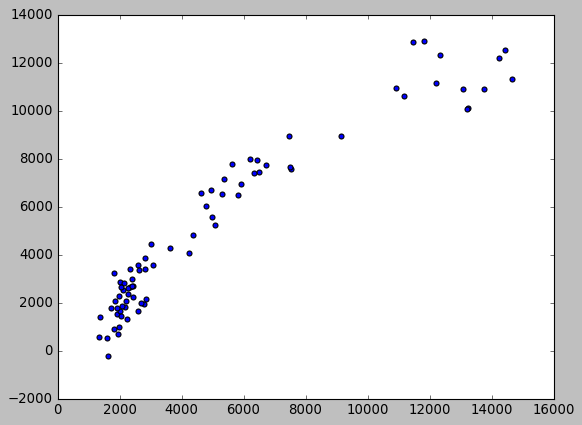

In [302]:
plt.scatter(y_test['NASDAQ'], y_pred)
plt.show()

In [304]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-8439.55) * Intercept + (-417.95) * U_R + (-141.13) * I_P_I + (132.76) * C_P_I + (-0.0) * T_E + (0.0) * T_I + (-11.09) * O_P + (-9.27) * M_P + (43.73) * F_P + (-28.33) * TAX + (-8.09) * GOV_S + (3.79) * N_S + (-2.5) * F_R + (-0.83) * T_P + 

In [149]:
df1=df.copy()

In [150]:
x=df1.drop('NASDAQ',axis=1) 
y=df1.NASDAQ

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [152]:
ss=StandardScaler() 
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [153]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        885.127753  1003.727531        0.931115    0.917723
Decision Tree Regressor    0.000000   369.369810        1.000000    0.988858
Random Forest Regressor  176.813391   308.863002        0.997251    0.992209
ANN Regressor            365.394911   457.566926        0.988261    0.982902


In [169]:
param_grid = {
    'max_depth': [5,10,15,20,25,30],
    'min_samples_leaf': [3,4, 5,10],
    'min_samples_split': [1,2,3,5,10,15,20,30],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [177]:
param_grid = {
    'max_depth': [2,3,5,7,10],
    'max_features': [3,4,5,7,10],
    'min_samples_leaf': [1,2,3,5,10,15,],
    'min_samples_split': [1,2,3,5,10,15,20],
    'n_estimators': [50,100, 200]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)


In [178]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': [3, 4, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 10, 15],
                         'min_samples_split': [1, 2, 3, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 200]})

In [179]:
print(grid_search.best_params_)

{'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}


In [173]:
param_grid = {
    'hidden_layer_sizes':[(20),(15,15)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [174]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=10000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [20, (15, 15)],
                         'solver': ['sgd', 'adam']})

In [175]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (15, 15), 'solver': 'adam'}


In [180]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(15,15), 
                    solver='adam',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=7, max_features=10, 
                            min_samples_leaf= 1,
                            min_samples_split= 3, n_estimators= 50,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=2,min_samples_leaf=5,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        885.127753  1003.727531        0.931115    0.917723
Decision Tree Regressor  280.320501   415.871804        0.993091    0.985876
Random Forest Regressor  176.237258   338.685780        0.997269    0.990632
ANN Regressor            295.056906   424.735635        0.992345    0.985267


In [182]:
rfr.feature_importances_

array([0.01085244, 0.00509538, 0.27248284, 0.62301482, 0.00520436,
       0.06421176, 0.00334075, 0.0018703 , 0.00233003, 0.00228926,
       0.00084398, 0.00129473, 0.0008497 , 0.00631966])

In [192]:
F_M=pd.DataFrame(rfr.feature_importances_,columns=['Imp'],index=x_train.columns)

In [201]:
F_M.sort_values(by='Imp',ascending=False)

,Imp
C_P_I,0.623015
Real_GDP,0.272483
T_I,0.064212
U_R,0.010852
T_P,0.006320
T_E,0.005204
I_P_I,0.005095
O_P,0.003341
F_P,0.002330
TAX,0.002289


<AxesSubplot:xlabel='M_P'>

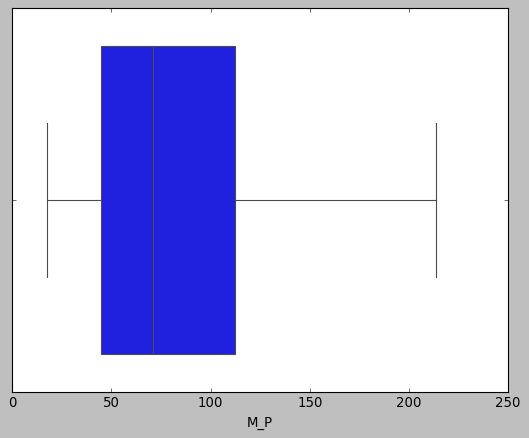

In [204]:
sns.boxplot(df.M_P)